In [302]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Create the data
---
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

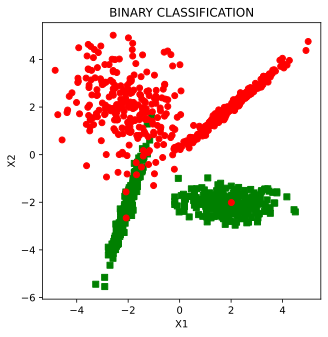

In [303]:
X,y = make_classification(n_samples=1000, n_features=2,
                    n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,
                    n_clusters_per_class=2, weights=None, flip_y=0.01,
                    class_sep=2.0, hypercube=True, shift=0.0, scale=1.0,
                    shuffle=True, random_state=42)

# convert to a pytorch tensor
data = torch.tensor(X).float()
labels = torch.tensor(y).float()
labels = labels.view(-1, 1)

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'gs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ro')
plt.title('BINARY CLASSIFICATION')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [304]:
def CreateModel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      nn.Sigmoid(),     # final activation unit
        )

  # loss function
  lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [305]:
# a function that trains the model

# a fixed parameter
epochs = 1000

def train(ANNmodel):

    # initialize losses
    losses = torch.zeros(epochs)

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANNmodel(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()



    # final forward pass
    predictions = ANNmodel(data)

    # compute the predictions and report accuracy
    # NOTE: shouldn't it be predictions>.5??
    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())

    return losses,predictions,totalacc

# Single Experiment

Final accuracy: 49.8%


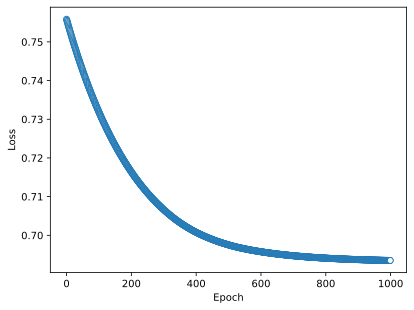

In [306]:
# create everything
ANN,lossfunc,optim = CreateModel(.01)

# run it
losses,predictions,totalacc = train(ANN)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Multiple Experiments

In [307]:
# the set of learning rates to test
learningrates = np.linspace(.001,.1,10)
learningrates = np.round(learningrates, 2)
# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),epochs))


# loop through learning rates
for i,lr in enumerate(learningrates):

    # create and run the model
    ANN,lossfunc,optim = CreateModel(lr)
    losses,predictions,totalacc = train(ANN)

    # store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()


/tmp/ipython-input-2251165324.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


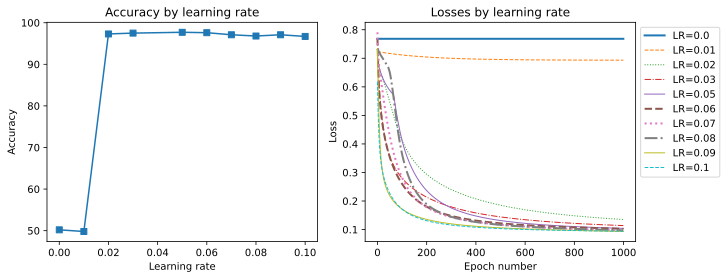

In [308]:
# Create a colormap
cmap = plt.get_cmap('tab10')

# Define custom line styles
line_styles = [
    ('-', 2),   # Solid line, bold
    ('--', 1),  # Dashed line, normal
    (':', 1),   # Dotted line, normal
    ('-.', 1),  # Dash-dot line, normal
    ('-', 1),   # Solid line, normal
    ('--', 2),  # Dashed line, bold
    (':', 2),   # Dotted line, bold
    ('-.', 2),  # Dash-dot line, bold
    ('-', 1),   # Solid line, normal
    ('--', 1)   # Dashed line, normal
]

# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

# Plot losses by learning rate with customized line styles
for i, lr in enumerate(learningrates):
    linestyle, linewidth = line_styles[i % len(line_styles)]
    ax[1].plot(allLosses[i], label=f'LR={lr}', color=cmap(i % 10), linestyle=linestyle, linewidth=linewidth)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')

# Add legend outside of the second subplot
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [309]:
accByLR

[tensor(50.2000),
 tensor(49.8000),
 tensor(97.3000),
 tensor(97.5000),
 tensor(97.7000),
 tensor(97.6000),
 tensor(97.1000),
 tensor(96.8000),
 tensor(97.1000),
 tensor(96.7000)]

In [310]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.8000)

# Experiments

1. Redo the experiment with the architecture provided below, and compare the result with the orignal architecture.

In [311]:
def CreateModel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      nn.Sigmoid(),     # final activation unit
        )

  # loss function
  lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

2. Decrease the number of hidden layers to 1 and compare the result with that of the original architecture.
3. Decrease the number of hidden layers to 1 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
4. Increase the number of hidden layers to 4 and compare the result with that of the original architecture.
5. Increase the number of hidden layers to 4 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
6. Increase the number of hidden layers to 4 but decrease the number of hidden units from 16 to 8 and compare the result with that of the original architecture.
7. Create another dataset using the make_moons (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), conduct an experiment on this data.